<a href="https://colab.research.google.com/github/bjungweapon/mjc.ai.ml/blob/BDU/bud.6.2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 ## 이상치 (Outlier)처리

 이상치 측정 과정에서 데이터들의 가변성, 변동성 때문에 나타날 수도 있고,  실제로 잘못된 실험에 의한 에러일 수도 있다.

 좀더 이상한 값을 찾아내서 처리 (전처리 )한다면,
 데이터가 올 바르다면 데이터가 신뢰있어야 한다.


In [2]:
## 이상치가 포함된 data를 먼저 만들어 보자.
## 이상치가 들어간 dataset를 찾기 어려우니 직접 만들어 보자.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
#정규분포 평균 50, 펴준편차 10을 가지는 데이터 200개 생성 --> 데이터 프레임으로 변환

In [22]:
data = 10 * np.random.randn(500) + 50    ## 200개 짜리, 평균 50, 표준편차가 10을 가지는 데이터 200개 짜리.
df = pd.DataFrame({"값": data})   ## data frame 형식으로 변경하자.  key - value 형식의 data frame 형식


In [23]:
df

,값
0,40.929264
1,53.632767
2,62.410602
3,51.361026
4,53.975363
...,...
495,55.913752
496,43.699236
497,44.742034
498,50.416251


In [24]:
## 이상치 삾임 (임의로)     loc : index를 추가 (삽입) 하는 함수
df.loc[201] = 1
df.loc[502] = 100
df.loc[503]  = 10
df.loc[204] = 110

In [8]:
#분포 시각화

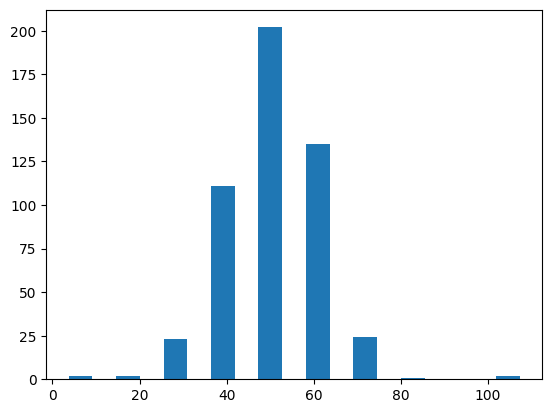

In [27]:
plt.hist(df["값"],bins=10, rwidth=0.5)   ## histrom, 넓이, bin: 분포
plt.show()

In [10]:
## 여러가지 방법을 사용하여 판단하게 된다.

IRQ (Interquearile Range, 사분위 범위) 방법
 . IQR Rule을 이용한 이상치 탐색은 사분위 개념으로 출발.
   - 전체 데이터들을 오름차순으로 정렬하고,
     정확히 4등분 (25%, 50%, 75%, 100%)로 나눔.
  - 여기서 75% 지점의 값과, 25% 지점의 값의 차이를 IQR 이라고 한다.

    ( 3사분위 수 - 1차 분위수 )의 차이 가 IQR

 boxblot 을 그렸을 때, 점으로 나오는 샘플들이 바로 IQR Rule에서 말하는 **이상치**

 Q1 - 1.5*IRQ  (mininum 값) 보다 작은 것 ,
 Q3 + 1.5*IQR   (maximum 값) 보다 큰 것
 들을 이상치 라고 한다.

 1.5 정도의 값 (통계적인 값)
     

In [11]:
## 찾았으면  값을 삭제 하거나,  값을 대체 하거나 한다.

In [12]:
## IRQ 사용해 보기

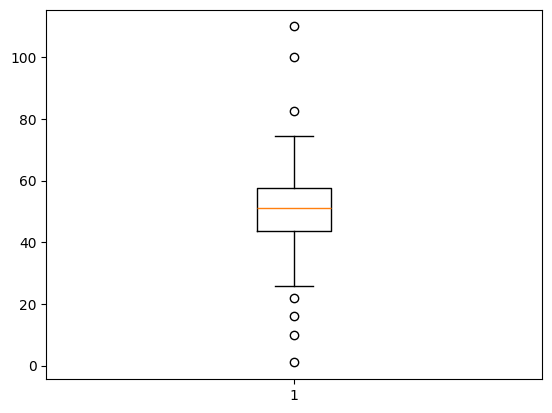

In [28]:
plt.boxplot(df["값"])
plt.show()

In [30]:
Q1= df["값"].quantile(.25)
Q2= df["값"].quantile(.5)
Q3= df["값"].quantile(.75)
#Q2= df["값"].quantile(.5)
IQR = Q3 - Q1

print("Q1 = ",Q1)
print("Q2 = ",Q2)
print("Q3 = ",Q3)
print("IQR = ",IQR)


Q1 =  43.733997644201125
Q2 =  51.17552086416538
Q3 =  57.44563689173246
IQR =  13.711639247531338


In [15]:
#describe 함수 사용

In [16]:
Q1 = df["값"].describe()["25%"]
Q2 = df["값"].describe()["50%"]
Q3 = df["값"].describe()["75%"]
IQR = Q3 - Q1

print("Q1 = ",Q1)
print("Q2 = ",Q2)
print("Q3 = ",Q3)
print("IQR = ",IQR)


Q1 =  41.97988292010009
Q2 =  49.45122437853441
Q3 =  56.07527219727911
IQR =  14.095389277179024


In [17]:
#둘다 동일한 경과이다.  표현법만 다르다.

In [18]:
condition = df["값"] > (Q3 + IQR * 1.5)
upperOutlier = df[condition]
condition = df["값"] > (Q1 - IQR * 1.5)
lowerOutlier = df[condition]

print(lowerOutlier)
print(upperOutlier)

              값
0     55.861697
1     46.785281
2     40.242870
3     30.390902
4     33.952387
..          ...
197   64.175181
198   82.921733
199   54.992076
202  100.000000
204  110.000000

[201 rows x 1 columns]
              값
198   82.921733
202  100.000000
204  110.000000
